In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Регрессия

In [2]:
data = pd.read_csv('task_1_capital.txt', sep='\s+')
data.shape

(96, 2)

In [3]:
capital = data["Capital"].to_numpy()
rental  = data["Rental"].to_numpy()
A = np.ones((data.shape[0], 2),dtype=float)
A[:, 1], Y = capital, rental

In [4]:
T = A.transpose()
W = np.linalg.pinv(T @ A) @ T @ Y
W

array([4.84020872e+03, 2.74462666e-02])

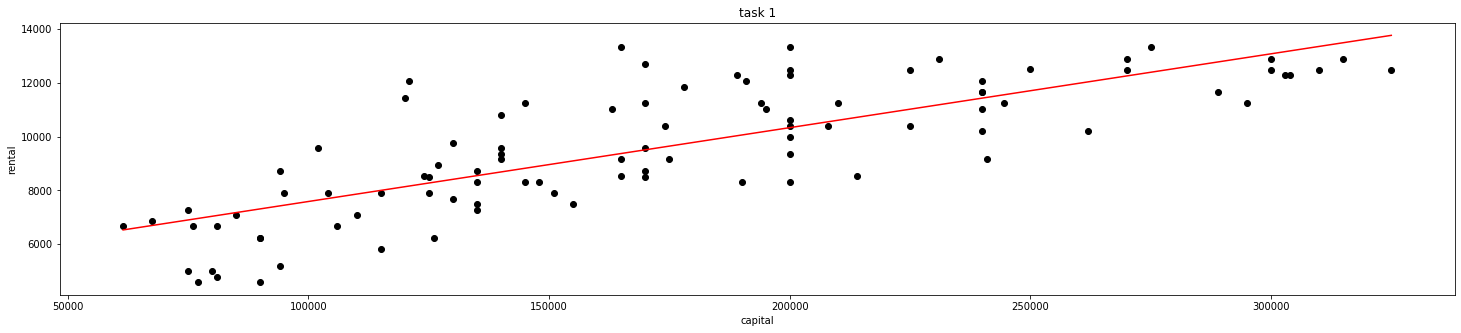

In [5]:
plt.figure(figsize=(25, 5))
plt.scatter(capital, rental, c="black")
plt.title("task 1")
plt.xlabel("capital")
plt.ylabel("rental")
plt.plot(capital, A @ W, c="red");

---

## SVM

In [30]:
metrics = {
    "accuracy"  : accuracy_score,
    "precision" : precision_score,
    "recall"    : recall_score,
    "f1"        : f1_score,
}

In [49]:
data = np.loadtxt("chips.txt", delimiter=",", dtype=float)
print(data.shape)
data[:10]

(118, 3)


array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ],
       [-0.52477 ,  0.2098  ,  1.      ],
       [-0.39804 ,  0.034357,  1.      ],
       [-0.30588 , -0.19225 ,  1.      ],
       [ 0.016705, -0.40424 ,  1.      ],
       [ 0.13191 , -0.51389 ,  1.      ]])

In [50]:
X, Y = data[:, :2], data[:, 2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, stratify=Y)

In [51]:
svc_param_grid = {
    "C"      : [0.001, 0.1, 1 , 10, 100],
    "kernel" : ["linear", "poly", "rbf"],
    "gamma"  : ["auto", "scale"]
}
svc = GridSearchCV(SVC(random_state=42), svc_param_grid, n_jobs=-1, scoring=["accuracy", "precision", "recall"], cv=5, iid=False, refit="accuracy")
svc.fit(X_train, Y_train);

In [52]:
svc.best_params_, svc.best_score_

({'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}, 0.8404411764705882)

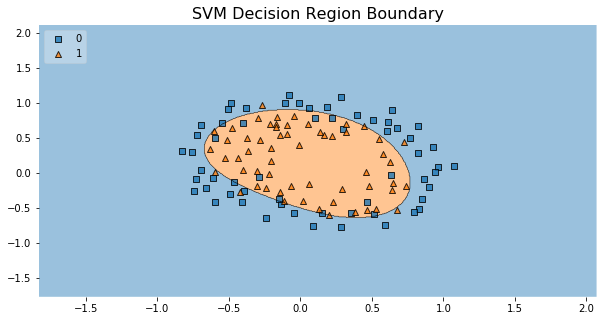

In [53]:
fig = plt.figure(figsize=(10,5))
plot_decision_regions(X=X, y=Y.astype(np.integer), clf=svc.best_estimator_, legend=2)
plt.title('SVM Decision Region Boundary', size=16);

----

# KNN

In [54]:
knn_param_grid = { 
    "n_neighbors" : [ i for i in range(3, X.shape[0] // 2) ],
    "weights"     : ["uniform", "distance"],
    "algorithm"   : ["ball_tree", "kd_tree", "brute"],
}
knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, n_jobs=-1, scoring=["accuracy", "precision", "recall"], cv=5, iid=False, refit="accuracy")
knn.fit(X_train, Y_train);

In [55]:
knn.best_params_, knn.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'},
 0.7566176470588235)

In [56]:
accuracy_score(Y_test, knn.best_estimator_.predict(X_test))

0.7222222222222222

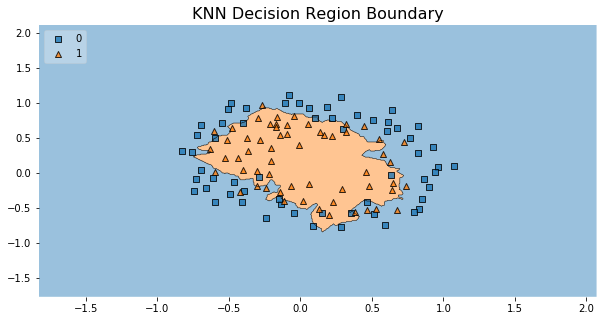

In [57]:
fig = plt.figure(figsize=(10, 5))
plot_decision_regions(X=X, y=Y.astype(np.integer), clf=knn.best_estimator_, legend=2)
plt.title('KNN Decision Region Boundary', size=16);

---

In [58]:
print("accuracy")
print("svc:", accuracy_score(Y_test, svc.best_estimator_.predict(X_test)))
print("knn:", accuracy_score(Y_test, knn.best_estimator_.predict(X_test)))

accuracy
svc: 0.7777777777777778
knn: 0.7222222222222222
